# Property Price Prediction(House Price Estimation)

# 1. Problem Statement

Property prices are influenced by multiple factors such as house size, location, age, and overall condition. Accurately estimating property prices is important for buyers, sellers, real estate companies, and financial institutions. Manual estimation often leads to incorrect pricing and poor decision-making.

The objective of this project is to build a regression-based machine learning model to predict property prices using historical housing data and to identify the most important factors influencing house prices.

# 2. Objectives of the Project

Understand property price patterns

Perform basic data preprocessing

Conduct minimal but meaningful Exploratory Data Analysis (EDA)

Build regression-based machine learning models

Evaluate model performance using regression metrics

Identify key price-influencing features

## Step 1: Import Required Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Step 2: Load Dataset


In [ ]:
df = pd.read_csv("/content/train.csv")

print("Dataset Shape:", df.shape)
print(df.head())


Dataset Shape: (1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePri

# Step 3:Basic Information

In [ ]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Step 4: Check Missing Values


In [ ]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


# Fill numerical missing values with median


In [ ]:
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


# Fill categorical missing values with mode


In [ ]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)



/tmp/ipython-input-3524465108.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


# Encode Categorical Variables

In [ ]:
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


# Define Target & Features


In [ ]:
X = df.drop("SalePrice", axis=1)   # Target column in property dataset
y = df["SalePrice"]


# Feature Scaling

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Train-Test Split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Linear Regression Model


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("----- Linear Regression -----")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))


----- Linear Regression -----
MAE: 21598.396867592794
MSE: 1249212973.3111856
RMSE: 35344.20706864401
R2 Score: 0.8371369170530625


# Random Forest Model


In [ ]:

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("\n Random Forest")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))



 Random Forest
MAE: 17673.32895547945
MSE: 832507336.7738254
RMSE: 28853.20323246321
R2 Score: 0.8914638941960822


# Feature Importance (Random Forest)

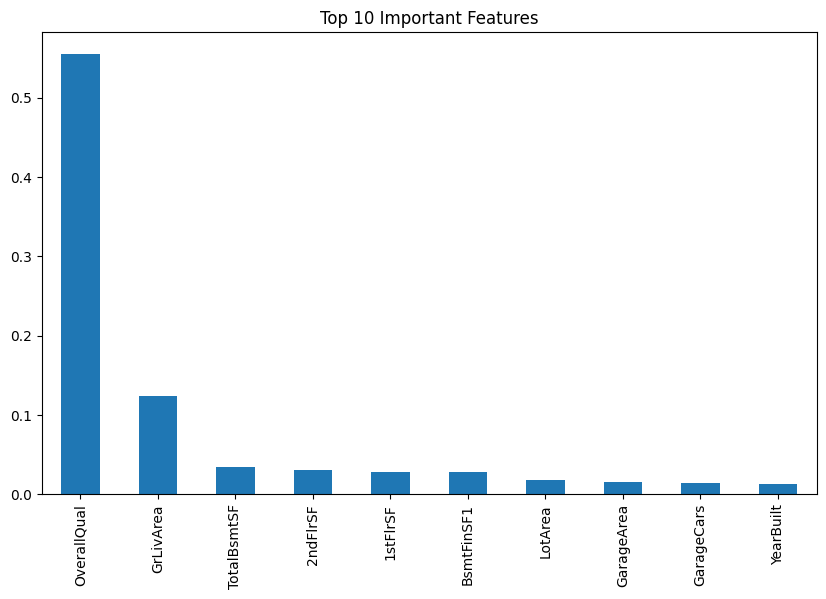

In [ ]:
importance = pd.Series(rf.feature_importances_, index=X.columns)
importance = importance.sort_values(ascending=False)

plt.figure(figsize=(10,6))
importance.head(10).plot(kind='bar')
plt.title("Top 10 Important Features")
plt.show()



# Price Distribution-Histogram

Text(0, 0.5, 'Frequency')

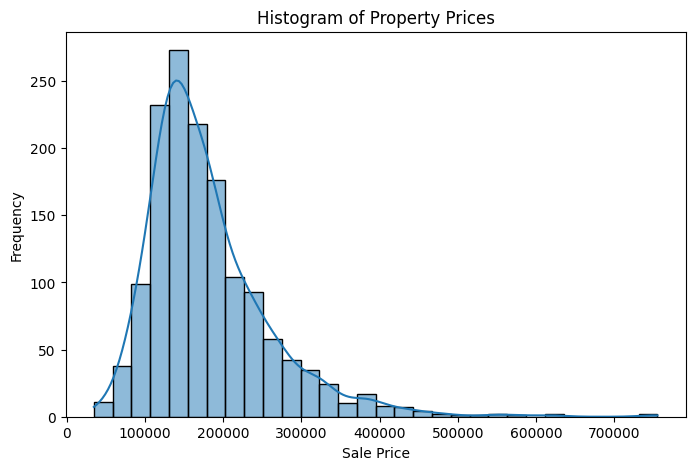

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df["SalePrice"], bins=30, kde=True)

plt.title("Histogram of Property Prices")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")


# Scatter Plot – House Size vs Price

Text(0, 0.5, 'Sale Price')

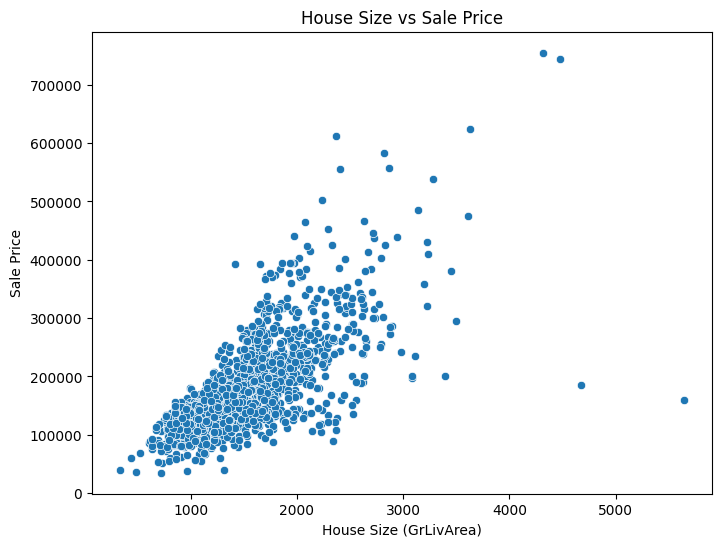

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["GrLivArea"], y=df["SalePrice"])

plt.title("House Size vs Sale Price")
plt.xlabel("House Size (GrLivArea)")
plt.ylabel("Sale Price")


# Boxplot – Price by Location

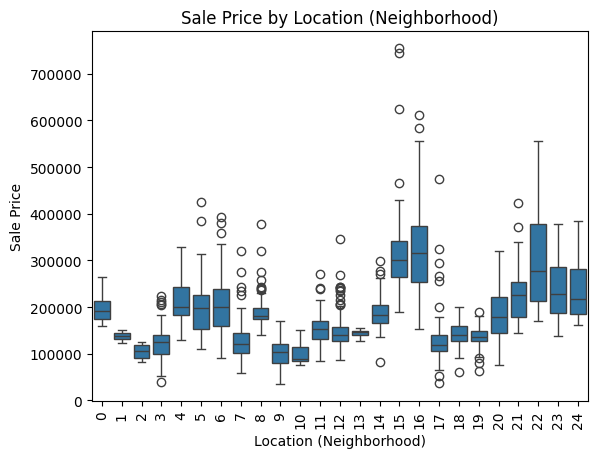

In [ ]:
sns.boxplot(x=df["Neighborhood"], y=df["SalePrice"])

plt.xticks(rotation=90)
plt.title("Sale Price by Location (Neighborhood)")
plt.xlabel("Location (Neighborhood)")
plt.ylabel("Sale Price")

plt.show()


# Scatter Plot – Property Age vs Sale Price

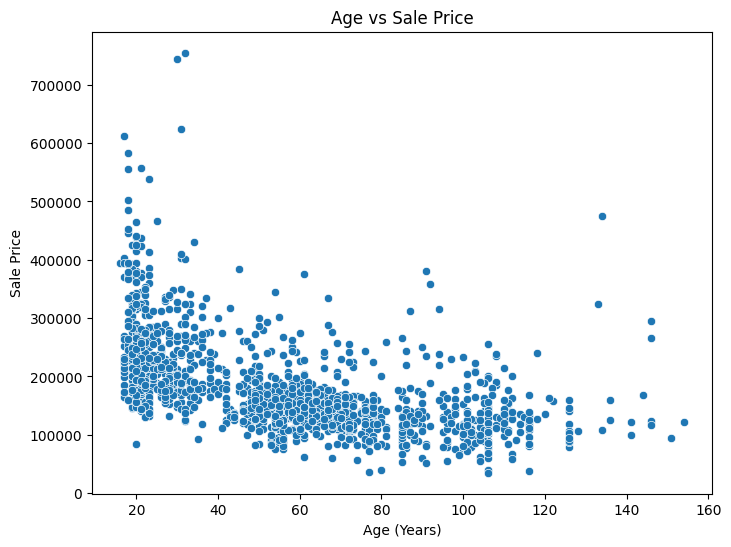

In [ ]:
from datetime import datetime

current_year = datetime.now().year
df["Age"] = current_year - df["YearBuilt"]

plt.figure(figsize=(8,6))
sns.scatterplot(x=df["Age"], y=df["SalePrice"])

plt.title("Age vs Sale Price")
plt.xlabel("Age (Years)")
plt.ylabel("Sale Price")

plt.show()

# Correlation Heatmap

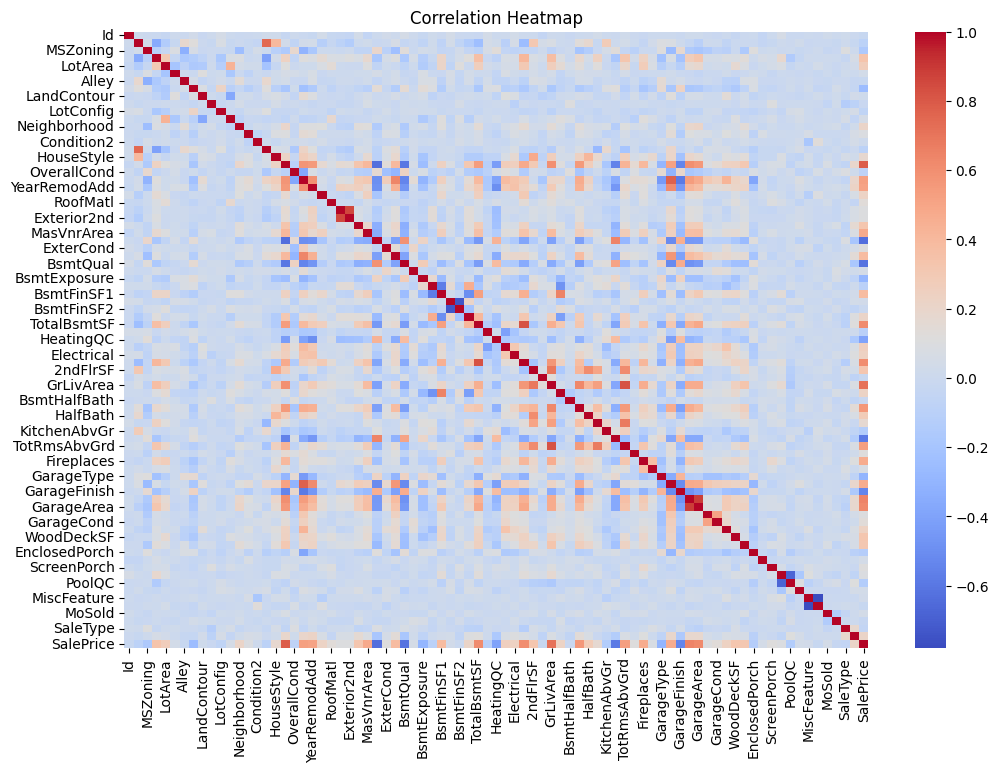

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# Actual vs Predicted (Random Forest)


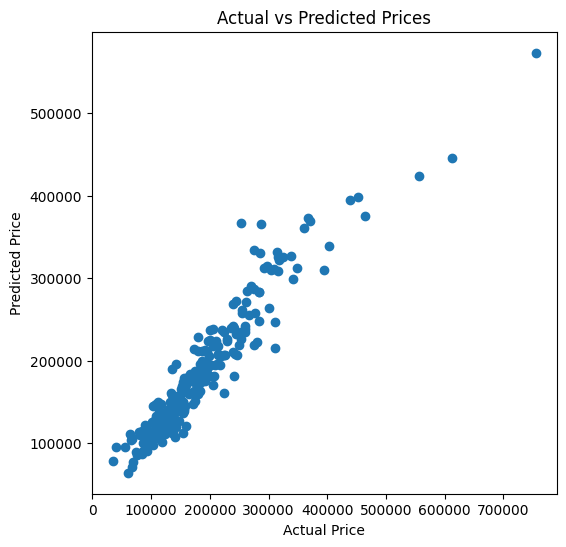

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

# Final Model Accuracy

In [ ]:
print("\nFinal Model (Random Forest) R2 Score:", r2_score(y_test, y_pred_rf))



Final Model (Random Forest) R2 Score: 0.8914638941960822
